# **Airbnb - Capstone Project **

---





In [ ]:
# First thing first we have to import all required libray that we going to use in this EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [ ]:
# Mount the drive and where the file is located
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [35]:
# df is our variable and the path of our data file
df = pd.read_csv('/content/drive/MyDrive/EDA/Airbnb NYC 2019.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


* We Loaded our Airbnb file successfully.
* We have **48895 Rows** and **16 Columns**.
* Now we have to see if it need some Data cleaning or not.
* **Let's See..**

## Data Cleaning :

In [36]:
# To get summury of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

* As we see that the in ***df.info()***    there is some **null values** in some columns lets see in which columns is it.

In [37]:
# To get the missing values:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

* Ahhh..we got it, the null value's columns are 
***'name'*** ,***'host_name'*** , ***'last_review'*** and ***'reviews_per_month'***

* As **'name'** ,**'host_name'** and **'last_review'** are not important for our analysis because it will not affect our calculations.
* And as far as concern to **'reviews_per_month'** ,we will take it becasue it can helpful for **ratings** to the listings.

### Missing Value Visualization 

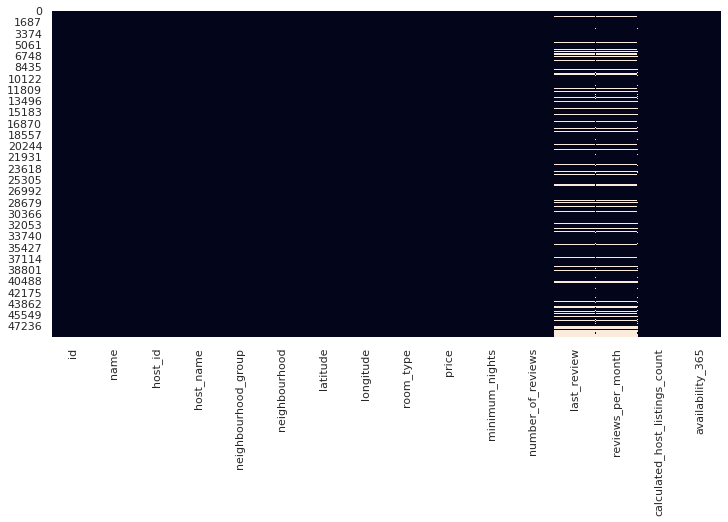

In [78]:
sns.heatmap(df.isnull(), cbar=False)

### Droping the Columns of null values

In [38]:
# Droping the columns 'name' , 'host_name' and 'last_review' 
df.drop(['name','host_name','last_review'],axis=1,inplace=True)

In [39]:
# Now Let's see how df looks now
df.isnull().sum()

id                                    0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

* **As we wanted the 'reviews_per_month' so thats why its only null values is showing of 'reviews_per_month'**

* **Lets fill it with zeros**

### Filling the null values with required numbers

In [40]:
# Changing null values to Zero
df.fillna({'reviews_per_month' : 0},inplace=True)

# And lets see df again
df.isnull().sum()

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

*   **Now there is no null values in our database**




In [41]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000




*   As we observed that the **'price' is 0** in (min) ,which is not acceptable in real world scenario.
*   And the **'minimum_nights' is 1250** in (max), which is too high in real world scenario

* Let's Figure it out....


In [42]:
# look over to price == 0
df[df['price']==0]

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
23161,18750597,8993084,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,0.05,4,28
25433,20333471,131697576,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2.56,4,127
25634,20523843,15787004,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,0.71,5,0
25753,20608117,1641537,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,0.53,2,0
25778,20624541,10132166,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,0.15,1,73
25794,20639628,86327101,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,4.28,6,176
25795,20639792,86327101,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,4.37,6,232
25796,20639914,86327101,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,4.35,6,222
26259,20933849,13709292,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,0.00,1,0
26841,21291569,101970559,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,0.11,6,333


In [43]:
# Lets replace of 0 with 120
df[df['price']==0] = df[df['price']==120] 


In [44]:
# Now let us check it
df[df['price']==0]

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365


* Now we have no Zero values in *'price'*
* Now lets see the **'minimum_night'** to get it corrected

* Lets assume that someone can pay full rent of 1 year (which 365 days) so lets convert **max()** of **'minimum_night'** to **365** 





In [45]:
# converting max() value of minimum_night to 365
df[df['minimum_nights'] >=365] = df[df['minimum_nights'] ==365]

In [46]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.887000e+04,4.887000e+04,48870.000000,48870.000000,48870.000000,48870.000000,48870.000000,48870.000000,48870.000000,48870.000000
mean,1.901848e+07,6.762985e+07,40.728952,-73.952172,152.759402,6.840311,23.277143,1.091070,7.146286,112.728443
std,1.098393e+07,7.862005e+07,0.054534,0.046163,240.199363,16.453077,44.556389,1.597354,32.960753,131.596499
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.472371e+06,7.821708e+06,40.690092,-73.983080,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967676e+07,3.080150e+07,40.723080,-73.955690,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915342e+07,1.074344e+08,40.763127,-73.936280,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,365.000000,629.000000,58.500000,327.000000,365.000000


### Data is Cleaned, Now we can go ahead of our Analysis





    

# **Problem Statments**

## 1. Most Listing in NYC




In [47]:
df.columns

Index(['id', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

**As *host_id* is unique we can use it to count the highest listing**

In [48]:
host_id_max = df['host_id'].value_counts().head(10)
host_id_max

219517861.0    327
107434423.0    232
30283594.0     121
137358866.0    103
12243051.0      96
16098958.0      96
61391963.0      91
22541573.0      87
200380610.0     65
1475015.0       52
Name: host_id, dtype: int64



*   As the highest **host_id is 327** which means the highest listing




In [49]:
# Creating a Data frame for Further Analysis
df_host_id = pd.DataFrame(data=host_id_max)
df_host_id.reset_index(inplace=True)
df_host_id.rename(columns = {'index' : 'Host_id','host_id' : 'Listing_count'},inplace=True)

In [50]:
df_host_id

,Host_id,Listing_count
0,219517861.0,327
1,107434423.0,232
2,30283594.0,121
3,137358866.0,103
4,12243051.0,96
5,16098958.0,96
6,61391963.0,91
7,22541573.0,87
8,200380610.0,65
9,1475015.0,52


In [51]:
# set up figsize For Visualization 
sns.set(rc={'figure.figsize':(12,6)})

#### Using Seaborn Barplot 

*   **Highest Listings**




[Text(0, 0, '1475015.0'),
 Text(0, 0, '12243051.0'),
 Text(0, 0, '16098958.0'),
 Text(0, 0, '22541573.0'),
 Text(0, 0, '30283594.0'),
 Text(0, 0, '61391963.0'),
 Text(0, 0, '107434423.0'),
 Text(0, 0, '137358866.0'),
 Text(0, 0, '200380610.0'),
 Text(0, 0, '219517861.0')]

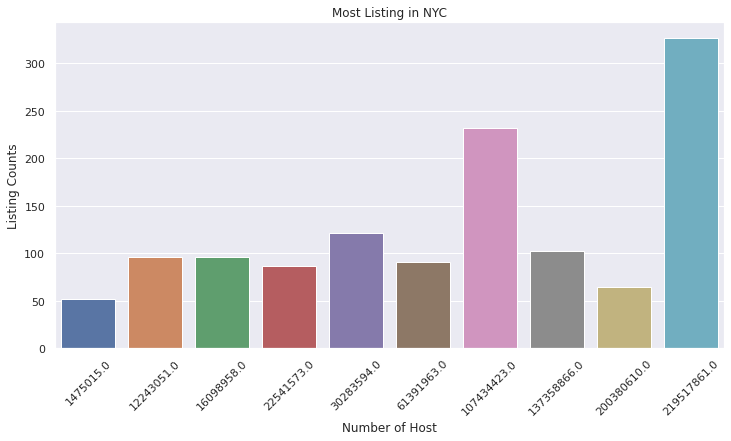

In [52]:
plot_1 = sns.barplot(x='Host_id',y='Listing_count',data=df_host_id)
plot_1.set_title('Most Listing in NYC')
plot_1.set_ylabel('Listing Counts')
plot_1.set_xlabel('Number of Host')
plot_1.set_xticklabels(plot_1.get_xticklabels(),rotation=45)

### Insightes of Graph

As Tally purpose the records are also be set to ids ,when ever we need we can find our with host_ids.

## 2. Listing in Each Neighbourhood Groups

#### Using matplotlib Line Plot 


**Listing in Each Neighbourhood**




In [53]:
total_neighbourhood_group= df['neighbourhood_group'].value_counts()
total_neighbourhood_group

Manhattan        21654
Brooklyn         20089
Queens            5664
Bronx             1090
Staten Island      373
Name: neighbourhood_group, dtype: int64

Text(0, 0.5, 'Counts')

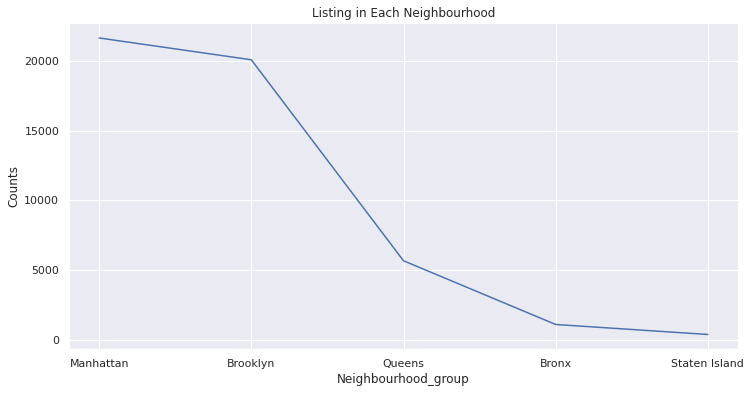

In [54]:
plt.plot(total_neighbourhood_group)

plt.title('Listing in Each Neighbourhood')
plt.xlabel('Neighbourhood_group')
plt.ylabel('Counts')

### Using matplotlib Bar Plot 


*   **Listing in Each Neighbourhood**

Text(0, 0.5, 'Counts')

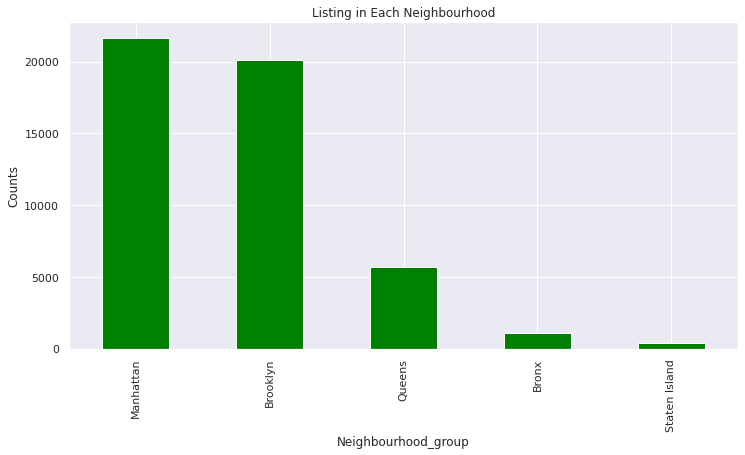

In [55]:
total_neighbourhood_group.plot(kind='bar',color='green')

plt.title('Listing in Each Neighbourhood')
plt.xlabel('Neighbourhood_group')
plt.ylabel('Counts')

#### **Insightes of Graph**

According to the Anaysis ***Manhatten*** is favorates in listing which have **highest listings** and follwed by ***Brooklyn, Queen , Bronx*** and least ***Staten island*** respectively.

## 3. Expensive Neighbourhood Group (Location of NYC)








In [56]:
# Creat a variable for grouping the neihbourhood_group
grouping_neighbour_group = df.groupby('neighbourhood_group')
grouping_neighbour_group.first()

,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood_group,,,,,,,,,,,,
Bronx,44096.0,190409.0,Highbridge,40.83232,-73.93184,Private room,40.0,1.0,219.0,2.04,3.0,353.0
Brooklyn,2539.0,2787.0,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,0.21,6.0,365.0
Manhattan,2595.0,2845.0,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,0.38,2.0,355.0
Queens,12937.0,50124.0,Long Island City,40.74771,-73.94740,Private room,130.0,3.0,248.0,2.25,1.0,215.0
Staten Island,42882.0,185978.0,St. George,40.64524,-74.08088,Private room,70.0,2.0,166.0,1.66,1.0,312.0


In [57]:
# Now as we want expensive group se have to select only  'price'  columns  
expensive_neighbour_group = grouping_neighbour_group['price'].describe()
expensive_neighbour_group

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,1090.0,87.577064,106.725371,10.0,45.0,65.0,99.0,2500.0
Brooklyn,20089.0,124.452238,186.922112,10.0,60.0,90.0,150.0,10000.0
Manhattan,21654.0,196.888011,291.421157,10.0,95.0,150.0,220.0,10000.0
Queens,5664.0,99.493997,167.125802,10.0,50.0,75.0,110.0,10000.0
Staten Island,373.0,114.812332,277.620403,13.0,50.0,75.0,110.0,5000.0


### Using Seaborn Barplot

Text(0.5, 0, 'Neighbourhood Group')

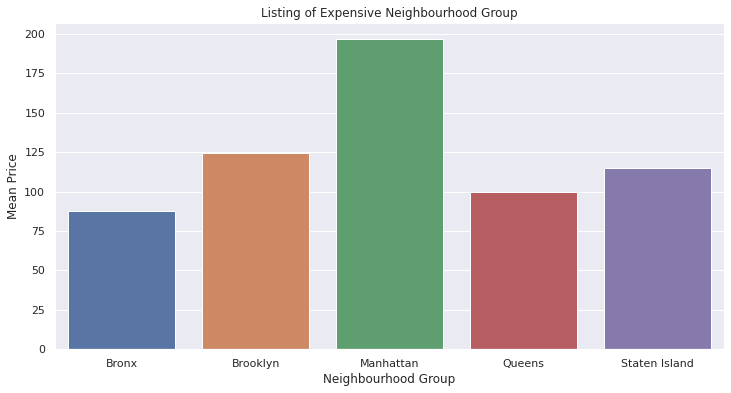

In [58]:
# We get price column so in it  'mean'  can give us average price value of each neighbourhood_group

plot_4 = sns.barplot(y=expensive_neighbour_group['mean'],x=expensive_neighbour_group.index[0:5])

plot_4.set_title('Listing of Expensive Neighbourhood Group')
plot_4.set_ylabel('Mean Price')
plot_4.set_xlabel('Neighbourhood Group')

#### Insightes of Graph

As Observed we can see that the most expensive neighbourhood gorup is **Manhatten** more then 200 average price as compare to other neighbour groups 

## 4. Most Listing in Each Room

In [59]:
df.columns

Index(['id', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [60]:
var_room_type = df['room_type'].value_counts()
var_room_type

Entire home/apt    25398
Private room       22315
Shared room         1157
Name: room_type, dtype: int64

In [61]:
dframe_room_type = pd.DataFrame(data=var_room_type)
dframe_room_type.reset_index(inplace=True)
dframe_room_type.rename(columns = {'index' : 'Rooms','room_type' : 'Counts'},inplace=True)
dframe_room_type

,Rooms,Counts
0,Entire home/apt,25398
1,Private room,22315
2,Shared room,1157


In [62]:
stat_max_room_list = df.groupby(['neighbourhood_group','room_type'])['host_id'].count().unstack()
stat_max_room_list

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,379,651,60
Brooklyn,9556,10122,411
Manhattan,13193,7982,479
Queens,2094,3372,198
Staten Island,176,188,9


### Using Seaborn Countplot

Text(0.5, 1.0, 'Most Listing for Each Room')

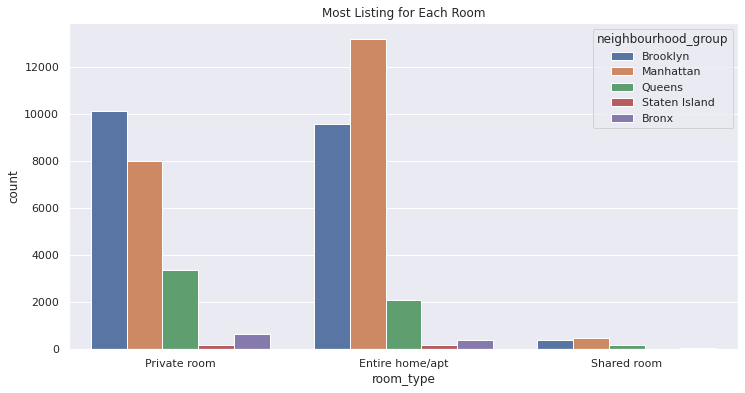

In [79]:
plot_5 = sns.countplot(x=df['room_type'],hue=df['neighbourhood_group'])
plot_5.set_title('Most Listing for Each Room')

#### Insightes of Graph

1. As we seen in Graph Most listings is for **Private room** and **Entire home/apt**.
2. Majority is for **Manhatten** and **Brooklyn**, Where **Manhatten** is more then **13000** listing in **Entire home/apt** and more then **7000** in **Private room**. And for **Brooklyn** more then **9000** for **Entire home** and more then 10000 for **Private room**
3. And very less for shared rooms for every neighbourhood_group

## 5. Most Listed Neighbourhood (Area of Location in NYC) (ex : Kensigton, Midtown, Harlem etc..) 

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48870 non-null  float64
 1   host_id                         48870 non-null  float64
 2   neighbourhood_group             48870 non-null  object 
 3   neighbourhood                   48870 non-null  object 
 4   latitude                        48870 non-null  float64
 5   longitude                       48870 non-null  float64
 6   room_type                       48870 non-null  object 
 7   price                           48870 non-null  float64
 8   minimum_nights                  48870 non-null  float64
 9   number_of_reviews               48870 non-null  float64
 10  reviews_per_month               48870 non-null  float64
 11  calculated_host_listings_count  48870 non-null  float64
 12  availability_365                

In [65]:
max_value_neigh = df['neighbourhood'].value_counts().head(15)
max_value_neigh

Williamsburg          3917
Bedford-Stuyvesant    3709
Harlem                2656
Bushwick              2461
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1563
Midtown               1544
East Harlem           1117
Greenpoint            1114
Chelsea               1113
Lower East Side        911
Astoria                900
Name: neighbourhood, dtype: int64

In [66]:
get_max_value_neigh =max_value_neigh.reset_index()
get_max_value_neigh

,index,neighbourhood
0,Williamsburg,3917
1,Bedford-Stuyvesant,3709
2,Harlem,2656
3,Bushwick,2461
4,Upper West Side,1971
5,Hell's Kitchen,1958
6,East Village,1853
7,Upper East Side,1798
8,Crown Heights,1563
9,Midtown,1544


#### Using Seaborn Countplot

[Text(0, 0, 'Williamsburg'),
 Text(0, 0, 'Bedford-Stuyvesant'),
 Text(0, 0, 'Harlem'),
 Text(0, 0, 'Bushwick'),
 Text(0, 0, 'Upper West Side'),
 Text(0, 0, "Hell's Kitchen"),
 Text(0, 0, 'East Village'),
 Text(0, 0, 'Upper East Side'),
 Text(0, 0, 'Crown Heights'),
 Text(0, 0, 'Midtown')]

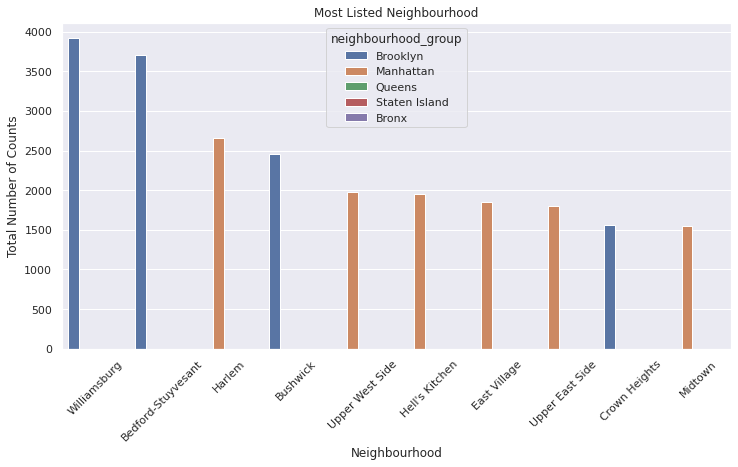

In [67]:

plt_6 =sns.countplot(x=df['neighbourhood'],order=df['neighbourhood'].value_counts().iloc[:10].index,hue=df['neighbourhood_group'])
plt_6.set_title('Most Listed Neighbourhood')
plt_6.set_xlabel('Neighbourhood')
plt_6.set_ylabel('Total Number of Counts')
plt_6.set_xticklabels(plt_6.get_xticklabels(), rotation=45)

## 6. Number of Reviews

In [68]:
df.columns

Index(['id', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

### Using Seaborn Histplot

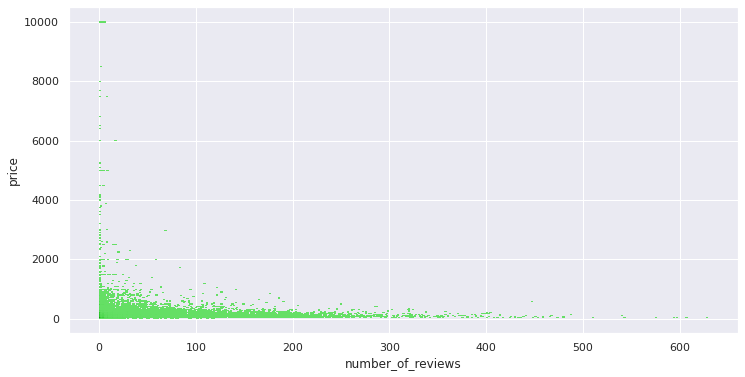

In [69]:
sns.histplot(y=df['price'],x=df['number_of_reviews'],color='green')

## 7. Most Densed Places According to Latitude and Longitude

In [70]:
df.columns

Index(['id', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

### Using Scatter Plot

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


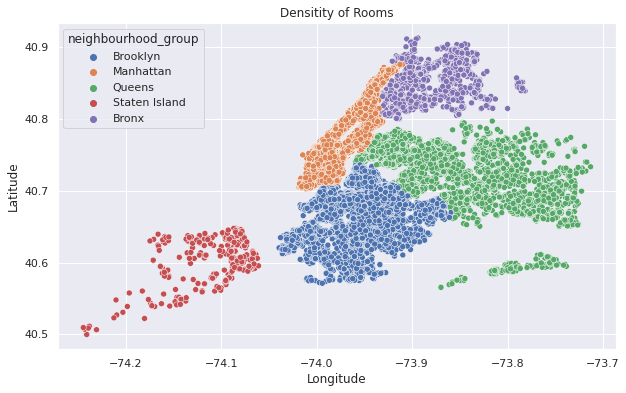

In [71]:
# we using Scatter plot which gives four parameters at once density latitiude ,longitude and neighbourhood
# Reference : https://seaborn.pydata.org/generated/seaborn.scatterplot.html
plt.figure(figsize = (10,6))
plot_7 = sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group)
plot_7.set_title('Densitity of Rooms')
plot_7.set_ylabel('Latitude')
plot_7.set_xlabel('Longitude')
plt.show()

### Insightes of Graph

Latitude and Longitude visulaization provides us that Brooklyn, Manhatten and Queens are most densed with hotels and room and appartments.

# Variables and Description : Used in This Project

**df** : main dataset which is read from CSV

**host_id_max** : host_id maximum counts

**df_host_id** : DataFrame for host_id

**plot_1** : Visualization of highest listings

**total_neighbourhood_group** : neighbourhood_group column counts

**grouping_neighbour_group** : grouping of neighbourhood_group column

**expensive_neighbour_group** : price of neighbourhood_group column

**plot_4** : Expensive neighbouring group

**var_room_type** : room_type counts

**dframe_room_type** : DataFrame of room_type

**stat_max_room_list** :Grouping of neighbourhood_group and room_type column

**plot_5** : visualization of Most Listing for Each Room

**max_value_neigh** : neighbourhood value count

**get_max_value_neigh** : sorting index of neighbourhood

**plt_6** : visualization of Most Listing for neighbourhood

**plot_7** : visualization for Most Densed Places According to Latitude and Longitude

# Solution To The Bussiness

As we gone through the entire project we encounter some key problem in it.


*   The highest listing is only some locations ,in our case only Manhatten and Brookly and some is for Queens but the other locations as negligibel listings

*   To get overcome with this problem the analysis we have is that the facility comes with the prices and services, if we could provide the facility so no one will come to our location to saty and paying us.






# Conclusions 

As we have gone through in deep understand of Airbnb pattern of providing services to the socity, we encounter some of the problems that have arrived.

1. Such as where should we have to work on to provide he services where the service is not commensed
2. we see how  prices go up and in which area they keep high it could be cons to us so we have to look in it furture and it will keep going with different options.

Thanks for Evaluation.



# GitHub Link:

https://github.com/Hasnain-Rizvi/Hasnain-EDA-AirBnb.git